In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
depression = pd.read_csv("Mental-Health-Twitter.csv")
df = depression.copy()

In [3]:
df.head()

,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    20000 non-null  int64 
 1   post_id       20000 non-null  int64 
 2   post_created  20000 non-null  object
 3   post_text     20000 non-null  object
 4   user_id       20000 non-null  int64 
 5   followers     20000 non-null  int64 
 6   friends       20000 non-null  int64 
 7   favourites    20000 non-null  int64 
 8   statuses      20000 non-null  int64 
 9   retweets      20000 non-null  int64 
 10  label         20000 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 1.7+ MB


In [5]:
df.shape

(20000, 11)

Check NaN Values

In [6]:
NAN = [(c, df[c].isna().mean()*100) for c in df]
NAN = pd.DataFrame(NAN, columns=["column_name", "percentage"])
NAN.sort_values("percentage", ascending=False)

,column_name,percentage
0,Unnamed: 0,0.0
1,post_id,0.0
2,post_created,0.0
3,post_text,0.0
4,user_id,0.0
5,followers,0.0
6,friends,0.0
7,favourites,0.0
8,statuses,0.0
9,retweets,0.0


In [7]:
#data manipulation 
df.drop("Unnamed: 0", axis=1, inplace=True)
df.drop("post_id", axis=1, inplace=True)
df.drop("user_id", axis=1, inplace=True)

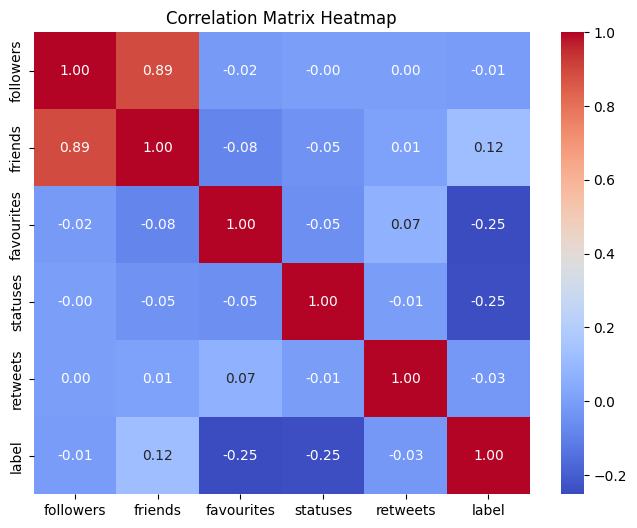

In [8]:
# Select only the numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Now calculate the correlation on the new DataFrame
correlation_matrix = numeric_df.corr()

# Create the heatmap plot
plt.figure(figsize=(8, 6)) # Set the size of the plot
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [9]:
#datetime object
df.post_created=df.post_created.apply(pd.to_datetime)

df["month"]=df.post_created.dt.month
df["year"]=df.post_created.dt.year

df.drop("post_created", axis=1, inplace=True)

In [10]:
df.head()

,post_text,followers,friends,favourites,statuses,retweets,label,month,year
0,It's just over 2 years since I was diagnosed w...,84,211,251,837,0,1,8,2015
1,"It's Sunday, I need a break, so I'm planning t...",84,211,251,837,1,1,8,2015
2,Awake but tired. I need to sleep but my brain ...,84,211,251,837,0,1,8,2015
3,RT @SewHQ: #Retro bears make perfect gifts and...,84,211,251,837,2,1,8,2015
4,It’s hard to say whether packing lists are mak...,84,211,251,837,1,1,8,2015


In [11]:
#describe to numerical values
df.describe().T

,count,mean,std,min,25%,50%,75%,max
followers,20000.0,900.48395,1899.913961,0.0,177.0,476.0,1197.0,28614.0
friends,20000.0,782.42875,1834.817945,0.0,211.0,561.0,701.0,28514.0
favourites,20000.0,6398.23555,8393.072914,0.0,243.0,2752.0,8229.0,39008.0
statuses,20000.0,44394.41960,140778.519201,3.0,5129.0,13251.0,52892.0,1063601.0
retweets,20000.0,1437.92730,15119.665118,0.0,0.0,0.0,1.0,839540.0
label,20000.0,0.50000,0.500013,0.0,0.0,0.5,1.0,1.0
month,20000.0,6.71135,4.735351,1.0,1.0,8.0,12.0,12.0
year,20000.0,2015.48595,1.485434,2009.0,2015.0,2016.0,2016.0,2017.0


Text Preprocessing¶


In [12]:
# !pip install textblob
# !pip install nltk 

from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word

Convert to lowercase

In [17]:
df["post_text"] = df["post_text"].apply(lambda x: " ".join(x.lower() for x in x.split()))

Removing numerical values

In [18]:
df["post_text"] = df["post_text"].str.replace("\d","")

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\hp\AppData\Local\Temp\ipykernel_12060\1010403440.py:1: SyntaxWarning: invalid escape sequence '\d'
  df["post_text"] = df["post_text"].str.replace("\d","")


Removing punctations

In [19]:
df["post_text"] = df["post_text"].str.replace("[^\w\s]","")

<>:1: SyntaxWarning: invalid escape sequence '\w'
<>:1: SyntaxWarning: invalid escape sequence '\w'
C:\Users\hp\AppData\Local\Temp\ipykernel_12060\740667631.py:1: SyntaxWarning: invalid escape sequence '\w'
  df["post_text"] = df["post_text"].str.replace("[^\w\s]","")


STOPWORDS

In [20]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
sw = stopwords.words("english")
df["post_text"] = df["post_text"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Lemmatization

In [21]:
from textblob import Word
nltk.download("wordnet")
nltk.download("omw-1.4")
df["post_text"] = df["post_text"].apply(lambda x: " ".join([Word(x).lemmatize()]))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...


Word Tokenization

In [22]:
from nltk.tokenize import word_tokenize
df["tokens"] = df["post_text"].apply(lambda x: TextBlob(x).words)

Frequency Analysis

In [23]:
df["frequency"] = df["post_text"].apply(lambda x: len(str(x).split(" ")))

In [24]:
df.groupby("frequency").max()
df[df["post_text"].str.contains("sos unique")]
longest_comment=df.iloc[3038,0]
print(longest_comment)

rt @5sos: unique new york unique new york unique new york unique new york unique new york unique new york unique new york unique new york u…


In [25]:
import nltk

nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [29]:
!python -m textblob.download_corpora

Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\brown.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\conll2000.zip.
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\movie_reviews.zip.


In [30]:
TextBlob(longest_comment).tags

[('rt', 'NN'),
 ('@', 'VBZ'),
 ('5sos', 'CD'),
 ('unique', 'JJ'),
 ('new', 'JJ'),
 ('york', 'NN'),
 ('unique', 'JJ'),
 ('new', 'JJ'),
 ('york', 'NN'),
 ('unique', 'JJ'),
 ('new', 'JJ'),
 ('york', 'NN'),
 ('unique', 'JJ'),
 ('new', 'JJ'),
 ('york', 'NN'),
 ('unique', 'JJ'),
 ('new', 'JJ'),
 ('york', 'NN'),
 ('unique', 'JJ'),
 ('new', 'JJ'),
 ('york', 'NN'),
 ('unique', 'JJ'),
 ('new', 'JJ'),
 ('york', 'NN'),
 ('unique', 'JJ'),
 ('new', 'JJ'),
 ('york', 'NN'),
 ('u…', 'NN')]

In [31]:
df.head()

,post_text,followers,friends,favourites,statuses,retweets,label,month,year,tokens,frequency
0,2 years since diagnosed #anxiety #depression. ...,84,211,251,837,0,1,8,2015,"[2, years, since, diagnosed, anxiety, depressi...",13
1,"sunday, need break, planning spend little time...",84,211,251,837,1,1,8,2015,"[sunday, need, break, planning, spend, little,...",9
2,awake tired. need sleep brain ideas...,84,211,251,837,0,1,8,2015,"[awake, tired, need, sleep, brain, ideas]",6
3,rt @sewhq: #retro bears make perfect gifts gre...,84,211,251,837,2,1,8,2015,"[rt, sewhq, retro, bears, make, perfect, gifts...",18
4,it’s hard say whether packing lists making lif...,84,211,251,837,1,1,8,2015,"[it, ’, s, hard, say, whether, packing, lists,...",16


# Data Visualization

In [32]:
# !pip install wordcloud

from wordcloud import WordCloud
from wordcloud import STOPWORDS

We need convert all reivews to single text

In [35]:
text = " ".join(i for i in df.post_text)

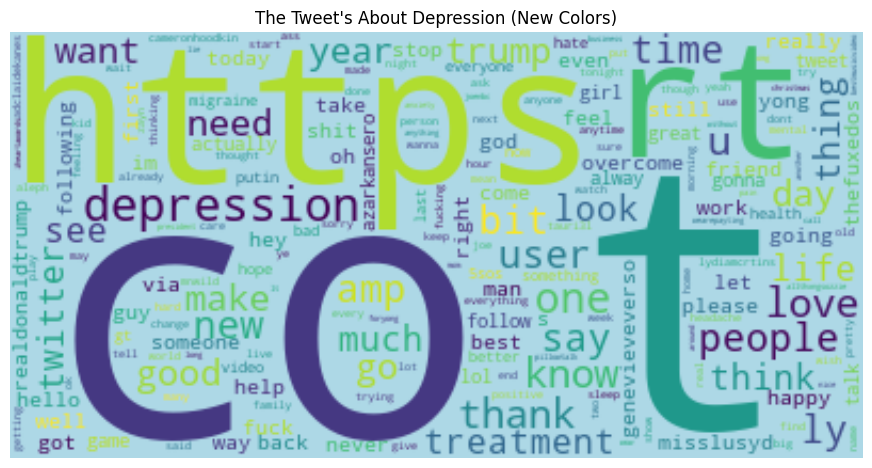

In [37]:

wordcloud = WordCloud(
    background_color="lightblue", # Changed background color
    colormap="viridis",          # Changed colormap
    collocations=False).generate(text)

plt.figure(figsize=[11,11])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("The Tweet's About Depression (New Colors)")
plt.show()

Most Common Words

In [38]:
print("\n",
      "\n",text.count("rt"),
      "\n",text.count("im"),
      "\n",text.count("one"),
      "\n",text.count("depression"),
      "\n",text.count("dont"),
      "\n",text.count("time"),
      "\n",text.count("love"),
      "\n",text.count("know"),
      "\n",text.count("thank"),
      "\n",text.count("people"),
     )



 
 6581 
 2334 
 2047 
 950 
 194 
 785 
 754 
 728 
 702 
 593


In [162]:
data = {
    "title": ["rt", "im" ,"one", "depression", "dont", "time", 
              "love","know","thank", "people"],
    "count": [ 6581 , 2334 ,2047, 950, 194, 785, 754, 728, 728, 593],
}

In [163]:
data = pd.DataFrame(data)
data.head(10)

,title,count
0,rt,6581
1,im,2334
2,one,2047
3,depression,950
4,dont,194
5,time,785
6,love,754
7,know,728
8,thank,728
9,people,593


Creating the barplot

C:\Users\hp\AppData\Local\Temp\ipykernel_12060\3193677312.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x="title", y="count", palette="viridis").set(title="Most Common Words:");


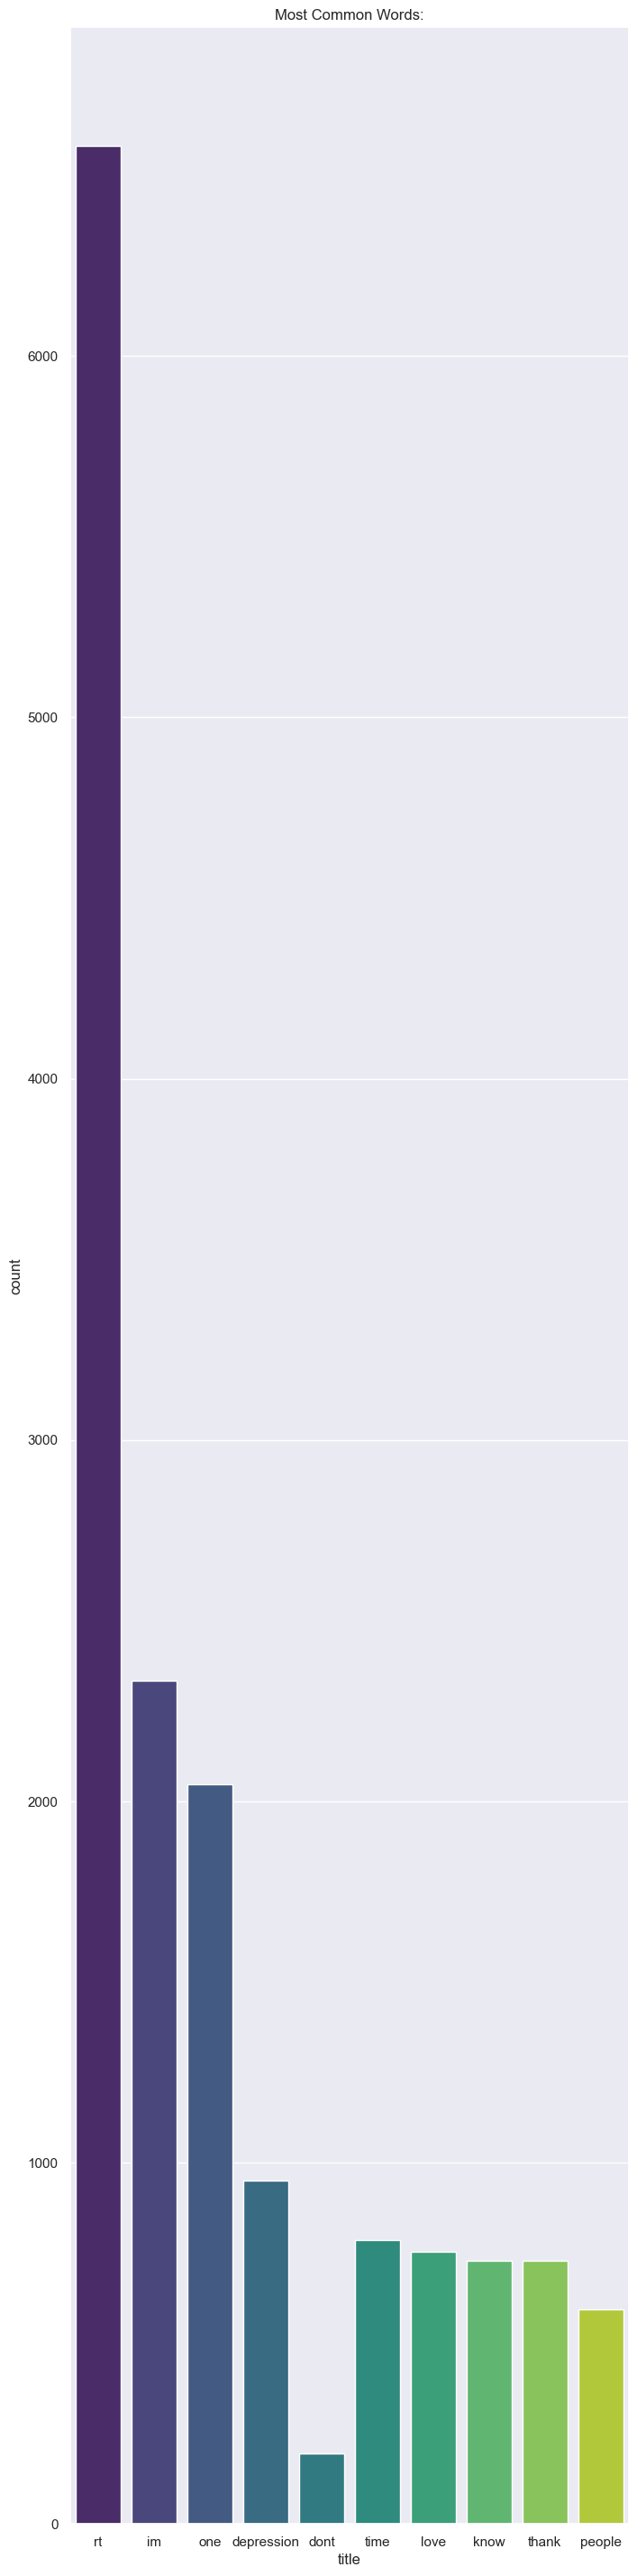

In [164]:
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 0.6})
sns.set(rc = {'figure.figsize':(8,36)})
sns.barplot(data=data, x="title", y="count", palette="viridis").set(title="Most Common Words:");

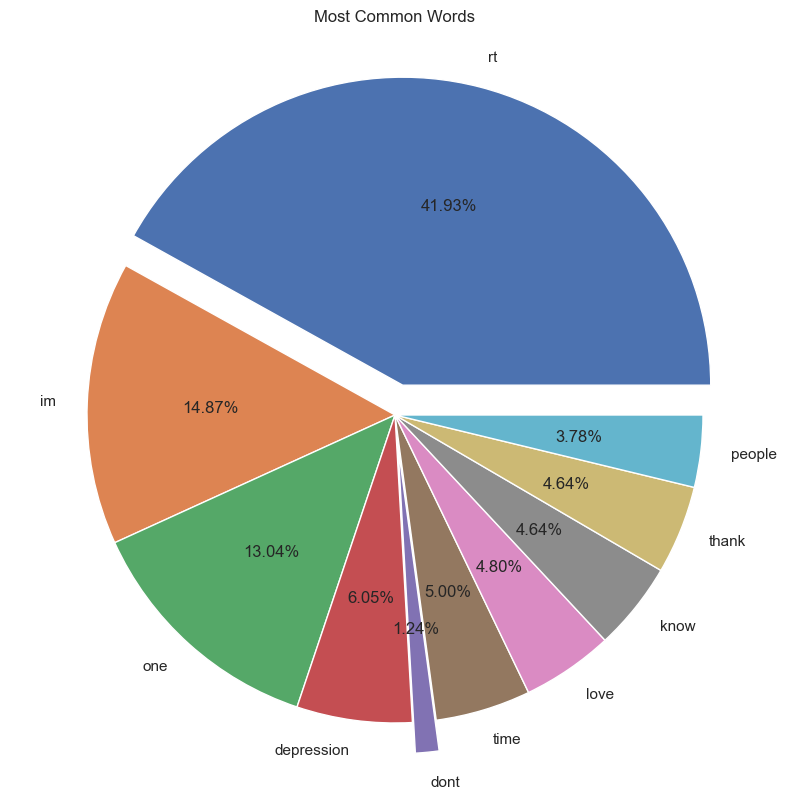

In [178]:
import matplotlib.pyplot as plt

# Increase the width of the figure by changing the first value in figsize
plt.figure(figsize=(10, 10))

myexplode = [0.1, 0, 0, 0, 0.1, 0, 0, 0, 0, 0] 

plt.pie(data["count"], labels=data["title"], autopct='%1.2f%%', explode=myexplode)

plt.title("Most Common Words")
plt.show()

In [59]:
df.groupby("month").count()

,post_text,followers,friends,favourites,statuses,retweets,label,year,tokens,frequency
month,,,,,,,,,,
1,6118,6118,6118,6118,6118,6118,6118,6118,6118,6118
2,435,435,435,435,435,435,435,435,435,435
3,1123,1123,1123,1123,1123,1123,1123,1123,1123,1123
4,1054,1054,1054,1054,1054,1054,1054,1054,1054,1054
5,644,644,644,644,644,644,644,644,644,644
6,8,8,8,8,8,8,8,8,8,8
7,359,359,359,359,359,359,359,359,359,359
8,659,659,659,659,659,659,659,659,659,659
9,639,639,639,639,639,639,639,639,639,639


In [60]:
df.head()

,post_text,followers,friends,favourites,statuses,retweets,label,month,year,tokens,frequency
0,2 years since diagnosed #anxiety #depression. ...,84,211,251,837,0,1,8,2015,"[2, years, since, diagnosed, anxiety, depressi...",13
1,"sunday, need break, planning spend little time...",84,211,251,837,1,1,8,2015,"[sunday, need, break, planning, spend, little,...",9
2,awake tired. need sleep brain ideas...,84,211,251,837,0,1,8,2015,"[awake, tired, need, sleep, brain, ideas]",6
3,rt @sewhq: #retro bears make perfect gifts gre...,84,211,251,837,2,1,8,2015,"[rt, sewhq, retro, bears, make, perfect, gifts...",18
4,it’s hard say whether packing lists making lif...,84,211,251,837,1,1,8,2015,"[it, ’, s, hard, say, whether, packing, lists,...",16


Tweets frequency per month

In [180]:
monthly_frequency = df.groupby('month')['frequency'].sum().reset_index()
print("\nAggregated Monthly Frequency:")
print(monthly_frequency)


Aggregated Monthly Frequency:
    month  frequency
0       1      48565
1       2       3879
2       3      10172
3       4      10729
4       5       6029
5       6         64
6       7       3846
7       8       5127
8       9       4835
9      10      14486
10     11       6743
11     12      48939


C:\Users\hp\AppData\Local\Temp\ipykernel_12060\1482536212.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


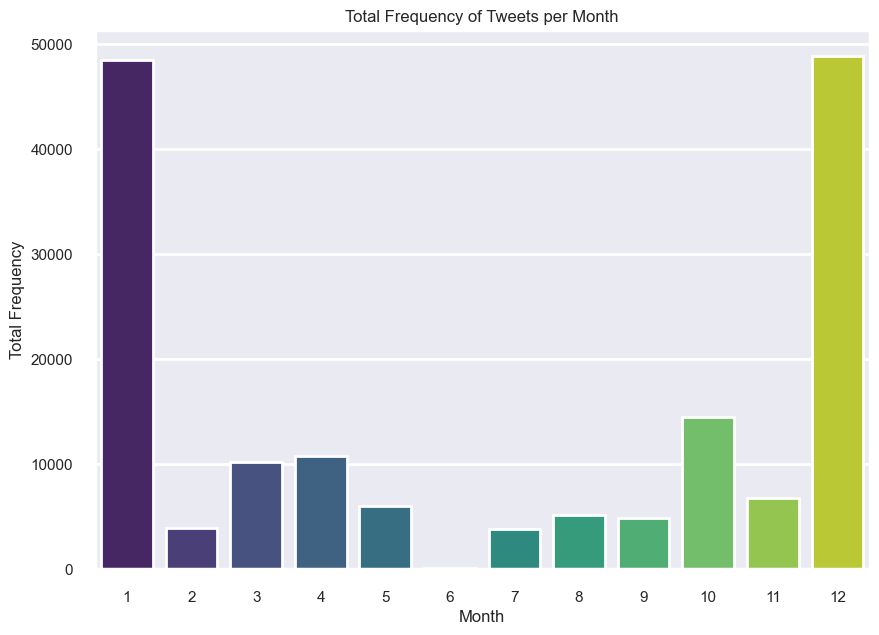

In [182]:

monthly_frequency = df.groupby('month')['frequency'].sum().reset_index()

# Set a single style and plot
plt.figure(figsize=(10, 7))
sns.set_context("poster", font_scale=.5)
ax = sns.barplot(
    data=monthly_frequency,
    x="month",
    y="frequency",
    palette="viridis"
)
ax.set_title("Total Frequency of Tweets per Month")
ax.set_xlabel("Month")
ax.set_ylabel("Total Frequency")

plt.show()

Tweets frequency per year

C:\Users\hp\AppData\Local\Temp\ipykernel_12060\3388679696.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


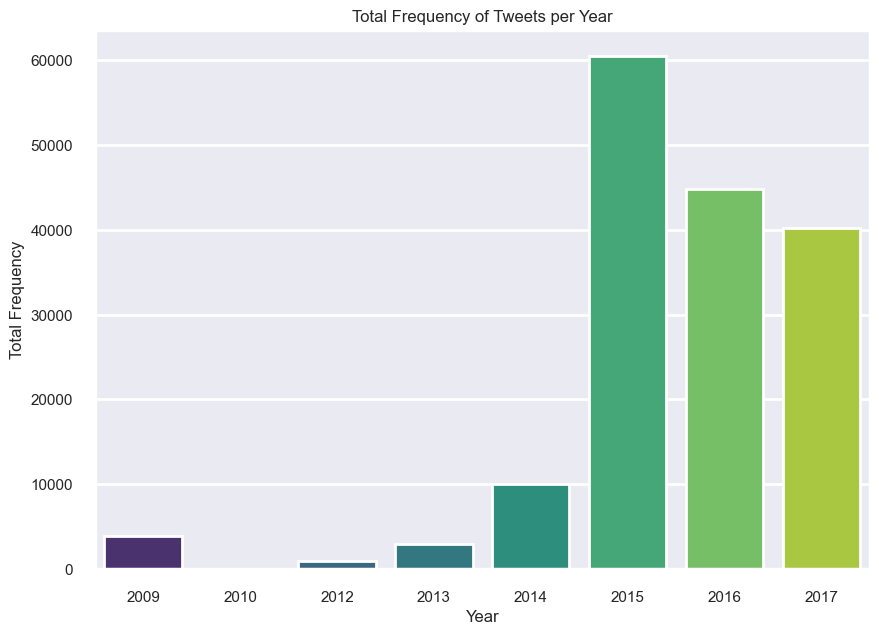

In [185]:

# Group by 'year' and sum the 'frequency'
yearly_frequency = df.groupby('year')['frequency'].sum().reset_index()

# Visualization
plt.figure(figsize=(10, 7))
sns.set_context("poster", font_scale=.5)

ax = sns.barplot(
    data=yearly_frequency,
    x="year",
    y="frequency",
    palette="viridis"
)

ax.set_title("Total Frequency of Tweets per Year")
ax.set_xlabel("Year")
ax.set_ylabel("Total Frequency")

plt.show()


Followers per month

C:\Users\hp\AppData\Local\Temp\ipykernel_12060\425537350.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="month", y="followers",  palette="viridis").set(title="Followers per month");


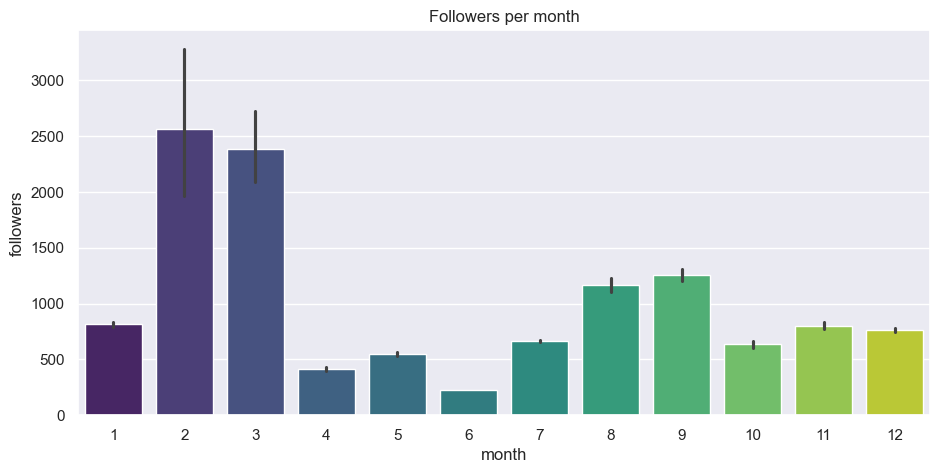

In [67]:
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 0.6})
sns.set(rc = {'figure.figsize':(11,5)})
sns.barplot(data=df, x="month", y="followers",  palette="viridis").set(title="Followers per month");

Followers per year

C:\Users\hp\AppData\Local\Temp\ipykernel_12060\1557471739.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="year", y="followers",  palette="viridis").set(title="Followers per year")


[Text(0.5, 1.0, 'Followers per year')]

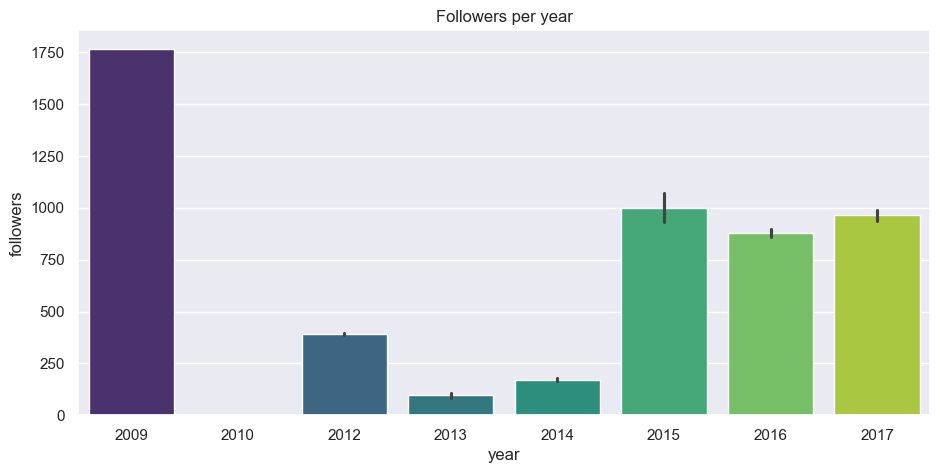

In [69]:
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 0.6})
sns.set(rc = {'figure.figsize':(11,5)})
sns.barplot(data=df, x="year", y="followers",  palette="viridis").set(title="Followers per year")

C:\Users\hp\AppData\Local\Temp\ipykernel_12060\4061461450.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x="label", y="followers", palette="viridis")
C:\Users\hp\AppData\Local\Temp\ipykernel_12060\4061461450.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Non-Depressed", "Depressed"])


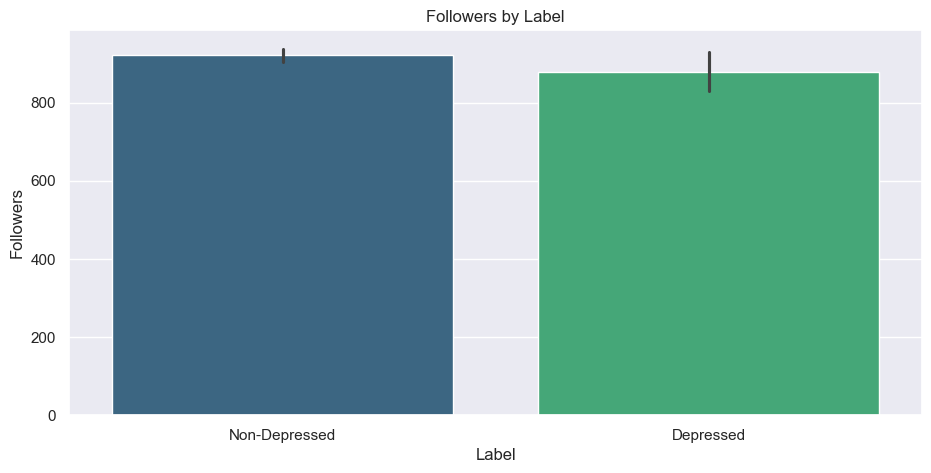

In [195]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
sns.set_context("poster", font_scale=0.5, rc={"grid.linewidth": 0.6})
sns.set(rc={'figure.figsize': (11, 5)})

# Create plot
ax = sns.barplot(data=df, x="label", y="followers", palette="viridis")

# Set title and labels
ax.set_title("Followers by Label")
ax.set_xlabel("Label")
ax.set_ylabel("Followers")

# Relabel x-axis: 0 → Non-Depressed, 1 → Depressed
ax.set_xticklabels(["Non-Depressed", "Depressed"])

plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_12060\1221337196.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x="label", y="retweets", palette="viridis")
C:\Users\hp\AppData\Local\Temp\ipykernel_12060\1221337196.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Non-Depressed", "Depressed"])


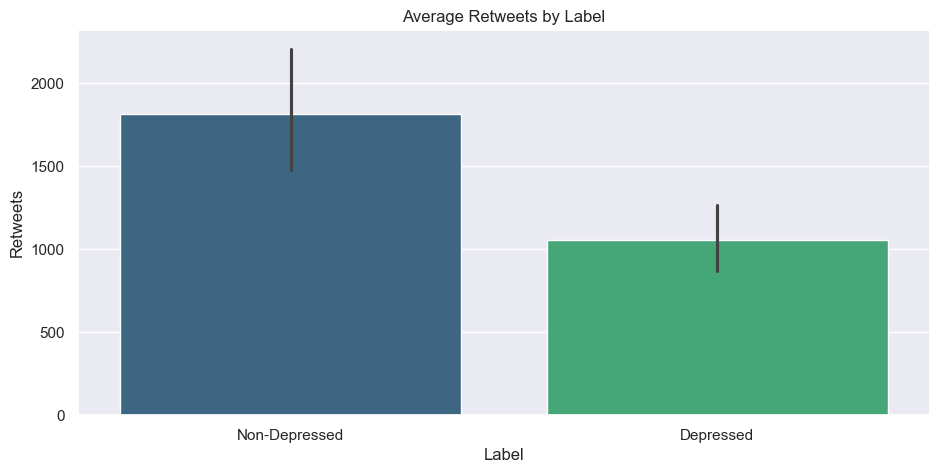

In [192]:
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
sns.set_context("poster", font_scale=.5, rc={"grid.linewidth": 0.6})
sns.set(rc={'figure.figsize': (11, 5)})

ax = sns.barplot(data=df, x="label", y="retweets", palette="viridis")
ax.set(title="Average Retweets by Label", xlabel="Label", ylabel="Retweets")

# Relabel x-axis: 0 → Non-Depressed, 1 → Depressed
ax.set_xticklabels(["Non-Depressed", "Depressed"])

plt.show()

[Text(0.5, 1.0, 'Density of Retweets/Likes')]

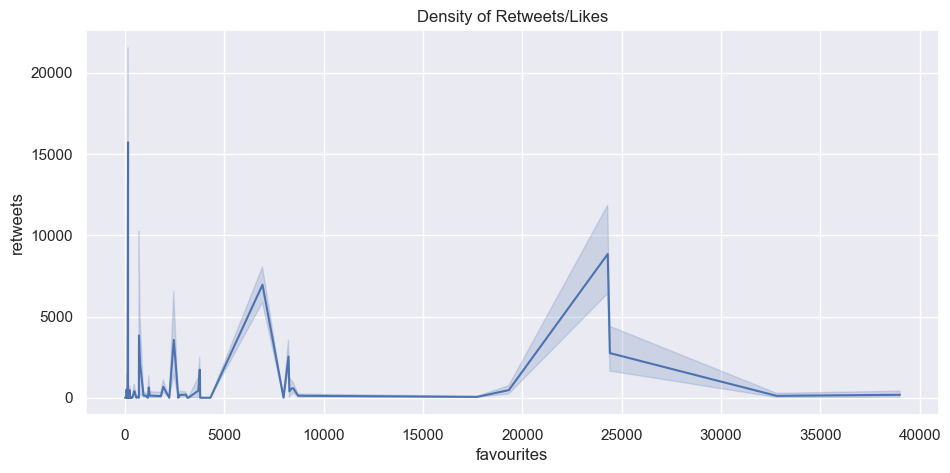

In [105]:
sns.lineplot(data=df, x="favourites", y="retweets").set(title="Density of Retweets/Likes")

In [106]:
df

,post_text,followers,friends,favourites,statuses,retweets,label,month,year,tokens,frequency
0,2 years since diagnosed #anxiety #depression. ...,84,211,251,837,0,1,8,2015,"[2, years, since, diagnosed, anxiety, depressi...",13
1,"sunday, need break, planning spend little time...",84,211,251,837,1,1,8,2015,"[sunday, need, break, planning, spend, little,...",9
2,awake tired. need sleep brain ideas...,84,211,251,837,0,1,8,2015,"[awake, tired, need, sleep, brain, ideas]",6
3,rt @sewhq: #retro bears make perfect gifts gre...,84,211,251,837,2,1,8,2015,"[rt, sewhq, retro, bears, make, perfect, gifts...",18
4,it’s hard say whether packing lists making lif...,84,211,251,837,1,1,8,2015,"[it, ’, s, hard, say, whether, packing, lists,...",16
...,...,...,...,...,...,...,...,...,...,...,...
19995,day without sunshine like night.,442,230,7,1063601,0,0,1,2017,"[day, without, sunshine, like, night]",5
19996,"boren's laws: (1) charge, ponder. (2) trouble,...",442,230,7,1063601,0,0,1,2017,"[boren, 's, laws, 1, charge, ponder, 2, troubl...",11
19997,flow chart thoroughly oversold piece program d...,442,230,7,1063601,0,0,1,2017,"[flow, chart, thoroughly, oversold, piece, pro...",14
19998,"ships safe harbor, never meant stay there.",442,230,7,1063601,0,0,1,2017,"[ships, safe, harbor, never, meant, stay, there]",7


# LDA-Topic-Modeling-Features

In [107]:
import re
import nltk
import emoji
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()

# Custom Tokenizer
def tokenize(text):
    text = emoji.replace_emoji(text, replace='')    # Removes Emoji's from Text
    text = re.sub(r"http\S+", "", text)             # Removes URLs from Text
    text = re.sub(r"[^\w\s]", "", text)             # Removes
    tokens = [word for word in nltk.word_tokenize(text) if len(word)>3]   # Tokenization and Keeping only the words with length at least 4
    stems = [stemmer.stem(item) for item in tokens]                       # Stemming
    return tokens

In [109]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tf = TfidfVectorizer(tokenizer=tokenize, stop_words='english', max_df=0.75, max_features=10000, use_idf=False, norm=None)
tf_vectors = vectorizer_tf.fit_transform(df.post_text)

d:\Projects\Deployments\deploy_venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [110]:
vectorizer_tf.get_feature_names_out()[100:200]

array(['5sostoday', '5sostumblrx', '5sosupdatesusa', '5sosupdateww',
       '5thdimdreamz', '61yrold', '62000000', '630am', '65000',
       '65000000', '70412', '70685', '7yrold', '800656hope', '8664887386',
       '89stevesmith', '933flz', '_5sosfamupdates', '_ahmadqushairi',
       '_betwixt', '_dpiddy', '_fatinsalihah', '_fawky', '_gabrielpicolo',
       '_kelibatbangsat', '_snape_', '_spalala', '_spetty',
       'a1sincedaynone', 'a__twat', 'a_venture3', 'aaay', 'aag2016',
       'aaron', 'aaron_ariff', 'aaroncarpenter', 'aartorias', 'abandoned',
       'abby', 'abcnetwork', 'ability', 'able', 'abroad', 'absence',
       'absolute', 'absolutely', 'abuse', 'abused', 'abusing',
       'acaciabrinley', 'academic', 'academy', 'accent', 'accept',
       'acceptable', 'acceptance', 'accepted', 'accepts', 'access',
       'accessories', 'accident', 'accidentally', 'accomplish',
       'accomplished', 'according', 'account', 'accountability',
       'accountants', 'accounting', 'accounts',

In [111]:
from sklearn import decomposition

# Creating top 25 topics/clusters to get Summary
lda = decomposition.LatentDirichletAllocation(n_components=25, max_iter=10, learning_method='online', learning_offset=50, n_jobs=1, random_state=42)

W1 = lda.fit_transform(tf_vectors)
H1 = lda.components_

In [112]:
W1.shape

(20000, 25)

In [113]:
# Prints top 15 relevant words for each of the 25 topics
num_words = 15

vocab = np.array(vectorizer_tf.get_feature_names_out())

top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_words-1:-1]]
topic_words = ([top_words(t) for t in H1])
topics = [' '.join(t) for t in topic_words]

In [114]:
topics

['depression love treatments years come overcome tweet trying tonight anxiety gets funny dead women important',
 'following anytime talk tilltheend tuesyong head idea song listen parents american text wonderful fuckin entire',
 'hello wait wearepayting foryong pain haha remember house cause thehill half party autism foxnews repair',
 'like trump feel thing real makes away believe migraine heart fake honestly hours working work',
 'home change america season migraines finally daily ways ready bitch minutes came knew soon months',
 'family live cool left second lindacurley37 girls addiction retweet awesome phone celtics tried heard happen',
 'want life right follow work watch hard care lets amazing joenbc different worth account propaganda',
 'fuck shit sleep mind lmao suicide tired sweet matter difference holy mood brain woman size',
 'stop lydiamcrtins wish christmas madreeve words playing wants merry child door deal meet college force',
 'realdonaldtrump thefuxedos better video sure p

In [116]:
# deciding to which topic/cluster the current document belongs to (argmax)

colnames = ["Topic" + str(i) for i in range(lda.n_components)]
docnames = ["Doc" + str(i) for i in range(len(df.post_text))]

df_doc_topic_pos = pd.DataFrame(np.round(W1,2),columns=colnames,index=docnames)
significanttopic = np.argmax(df_doc_topic_pos.values,axis=1)

df_doc_topic_pos['dominant_topic'] = significanttopic

In [117]:
# Final feautures
df_doc_topic_pos

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,...,Topic16,Topic17,Topic18,Topic19,Topic20,Topic21,Topic22,Topic23,Topic24,dominant_topic
Doc0,0.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
Doc1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.89,24
Doc2,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.72,0.01,0.01,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.15,7
Doc3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.09,0.00,11
Doc4,0.09,0.00,0.00,0.00,0.00,0.00,0.28,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.46,0.00,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Doc19995,0.01,0.01,0.01,0.26,0.01,0.01,0.01,0.01,0.01,0.01,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.26,0.01,3
Doc19996,0.01,0.01,0.01,0.01,0.01,0.01,0.41,0.01,0.01,0.01,...,0.21,0.01,0.01,0.01,0.21,0.01,0.01,0.01,0.01,6
Doc19997,0.00,0.00,0.12,0.00,0.00,0.00,0.12,0.00,0.00,0.00,...,0.00,0.00,0.12,0.00,0.00,0.00,0.12,0.00,0.00,11
Doc19998,0.01,0.17,0.01,0.01,0.01,0.01,0.17,0.01,0.01,0.17,...,0.01,0.01,0.01,0.01,0.01,0.01,0.17,0.01,0.01,1


In [118]:
df_doc_topic_pos.columns


Index(['Topic0', 'Topic1', 'Topic2', 'Topic3', 'Topic4', 'Topic5', 'Topic6',
       'Topic7', 'Topic8', 'Topic9', 'Topic10', 'Topic11', 'Topic12',
       'Topic13', 'Topic14', 'Topic15', 'Topic16', 'Topic17', 'Topic18',
       'Topic19', 'Topic20', 'Topic21', 'Topic22', 'Topic23', 'Topic24',
       'dominant_topic'],
      dtype='object')

In [119]:
df_doc_topic_pos.to_csv("lda_topic_model.csv")

### Visualize LDA

C:\Users\hp\AppData\Local\Temp\ipykernel_12060\765133977.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weights, y=top_features, ax=axes[topic_idx], palette="viridis")
C:\Users\hp\AppData\Local\Temp\ipykernel_12060\765133977.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weights, y=top_features, ax=axes[topic_idx], palette="viridis")
C:\Users\hp\AppData\Local\Temp\ipykernel_12060\765133977.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weights, y=top_features, ax=axes[topic_idx], palette="viridis")
C:\Users\hp\AppData

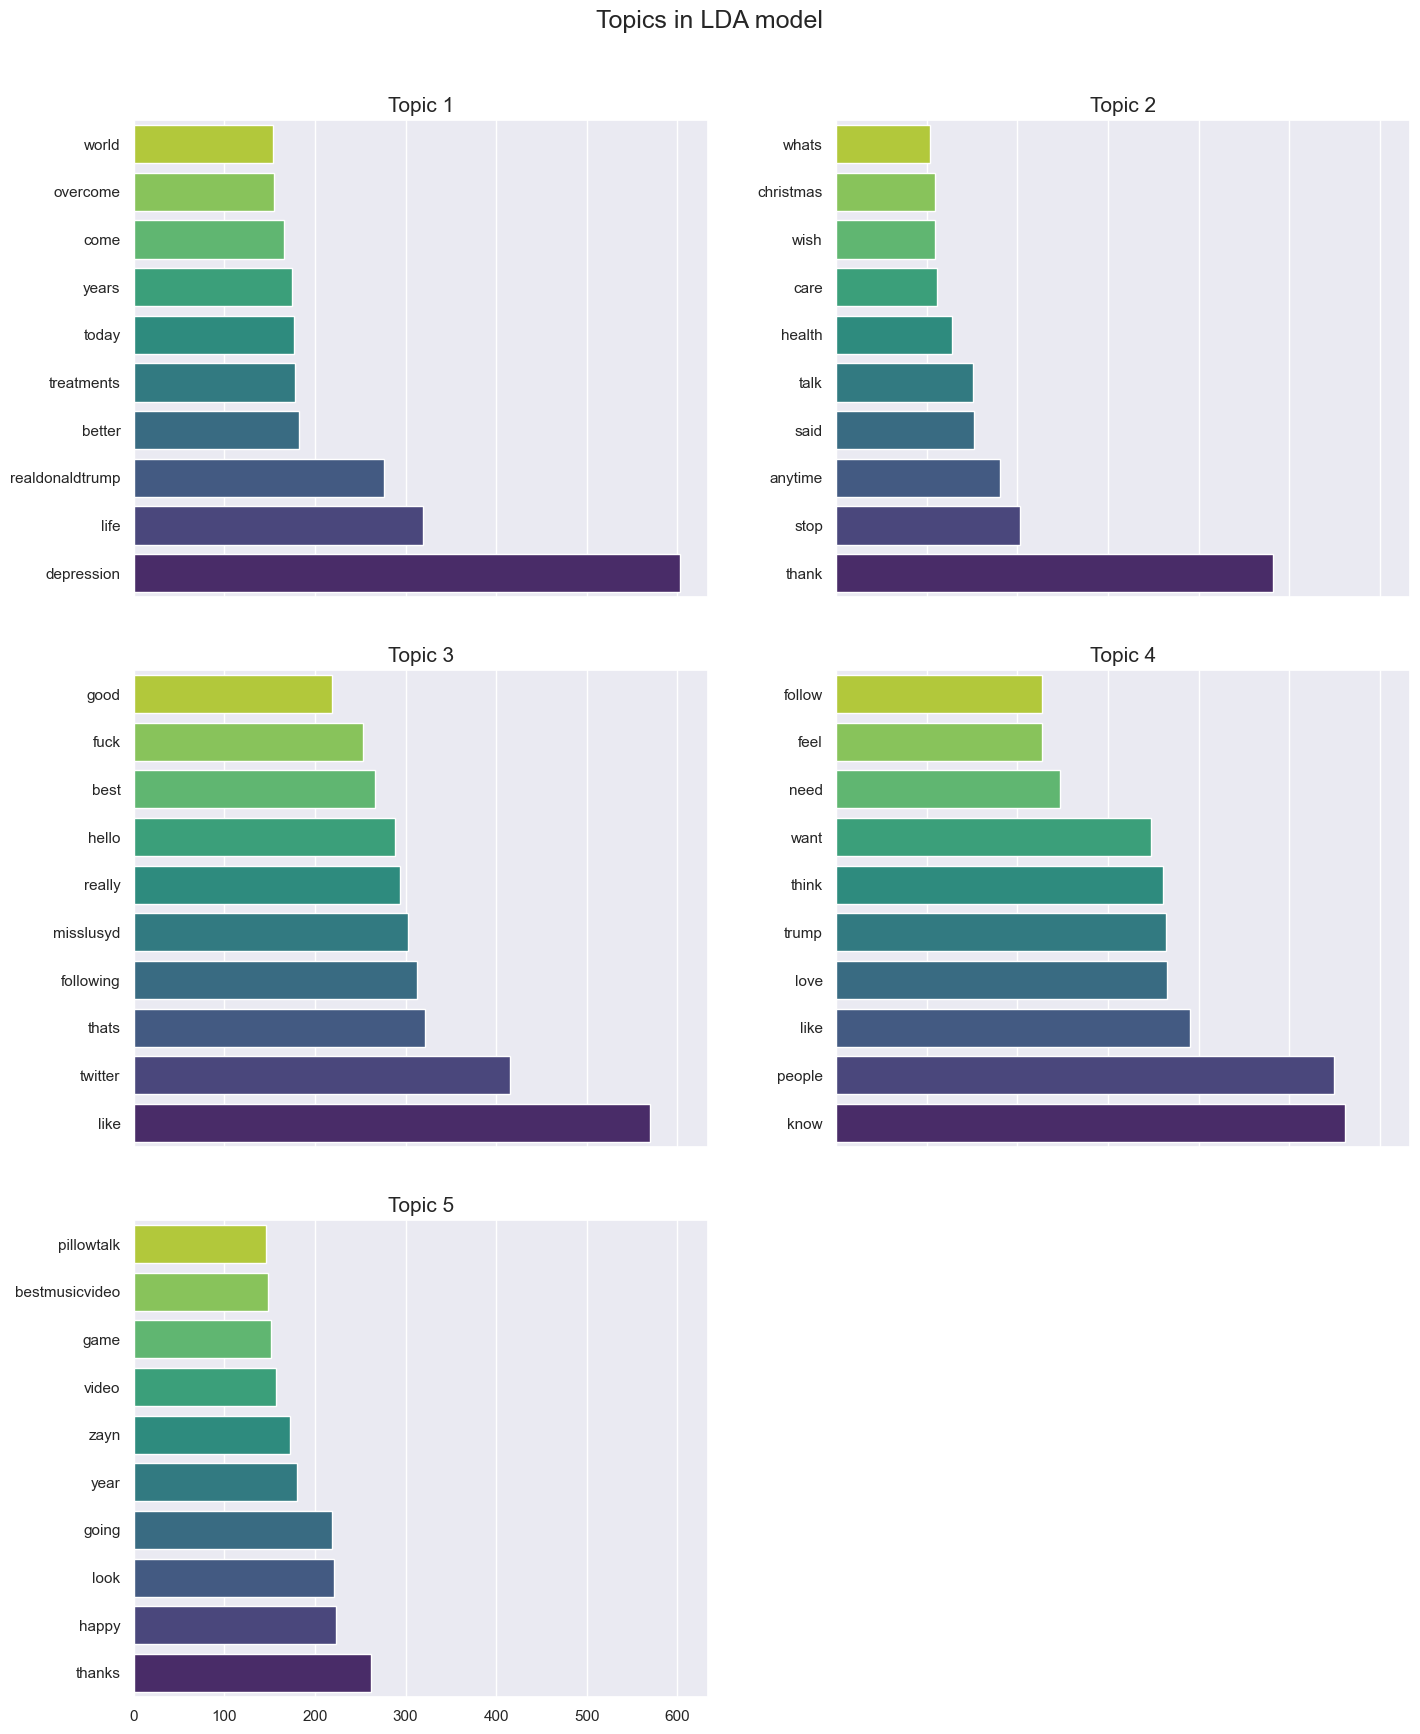

In [125]:
from sklearn.decomposition import LatentDirichletAllocation

n_topics = 5

lda = LatentDirichletAllocation(
    n_components=n_topics,
    max_iter=10,
    learning_method='online',
    random_state=42
)
lda.fit(tf_vectors)


import math

def plot_top_words(model, feature_names, n_top_words, title):
    # Calculate the number of rows needed for 2 columns per row
    n_topics = model.n_components
    nrows = math.ceil(n_topics / 2)

    # Create the subplots with the new layout (nrows rows, 2 columns)
    # Adjust figsize to give more vertical space
    fig, axes = plt.subplots(nrows, 2, figsize=(15, 6 * nrows), sharex=True)

    # Ensure axes is a 1D array even if there's only one row
    axes = axes.flatten()

    for topic_idx, topic in enumerate(model.components_):
        # Stop if we run out of axes (e.g., odd number of topics)
        if topic_idx >= len(axes):
            break

        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]
        
        # Create a bar plot for the topic's top words
        sns.barplot(x=weights, y=top_features, ax=axes[topic_idx], palette="viridis")
        axes[topic_idx].set_title(f'Topic {topic_idx + 1}', fontdict={'fontsize': 15})
        axes[topic_idx].invert_yaxis()
        
    # Hide any unused subplots
    for i in range(topic_idx + 1, len(axes)):
        axes[i].axis('off')
        
    fig.suptitle(title, fontsize=18)
    plt.tight_layout(pad=3.0)
    plt.show()

# Run the visualization function
n_top_words = 10
tf_feature_names = vectorizer_tf.get_feature_names_out()
plot_top_words(lda, tf_feature_names, n_top_words, "Topics in LDA model")

# Emoji Sentiment Features

In [142]:
new_df = df.copy()

In [143]:
from collections import defaultdict
import re

# A simple emoji sentiment lexicon
positive_emoji = ['❤️','❤','😍','♥️','😊','💕','👍','😂','🙌','🤑','💖','✨','😊','🎉','💞','😝','😈','😃','😁','😎','😘','💓','😉','😬','😄','😀','😜','💗','😌','😆','😛','😻','🙋','❣️','🙂','😇','💝','😏','😋','🤗','🙆','🤓','😚','😙','😸','😼','😺','😽']
neutral_emoji = ['🙏','💜','💙','👽','💛','💟','💚','😅','🙃','💩','😳','🙄','😑','🙇','🙎','😐','😶']
negative_emoji = ['💥','💘','😭','😱','👎','😫','😨','😢','💀','🤔','👻','😓','💦','😤','😩','😴','💔','😒','😪','😈','😣','😮','😡','😕','😔','😠','😷','😥','😞','😲','😰','🙀','😖','😧','😟','😹','😵','😶','😯','🤒','🤕','😾','💤']

# Compile all emojis into a single list for easy pattern matching
all_emojis = positive_emoji + neutral_emoji + negative_emoji
emoji_pattern = re.compile("|".join(re.escape(e) for e in all_emojis))

def count_emoji_sentiment(text):
    """Counts positive, negative, and neutral emojis in a given text."""
    counts = defaultdict(int)
    # Find all emojis in the text
    found_emojis = emoji_pattern.findall(text)
    
    for emoji in found_emojis:
        if emoji in positive_emoji:
            counts['pos_emojis'] += 1
        elif emoji in negative_emoji:
            counts['neg_emojis'] += 1
        elif emoji in neutral_emoji:
            counts['neu_emojis'] += 1
    return counts

new_df['positive_emoji'] = 0
new_df['negative_emoji'] = 0
new_df['neutral_emoji'] = 0

# 4. Use your code snippet to count and update the DataFrame
for idx, text in enumerate(new_df['post_text']):
    tmp = emoji_pattern.findall(text)   # generates a list of emoji's present in the post
    
    for emoji in tmp:
        if emoji in positive_emoji:
            new_df.at[idx, 'positive_emoji'] += 1
        elif emoji in negative_emoji:
            new_df.at[idx, 'negative_emoji'] += 1
        else:
            new_df.at[idx, 'neutral_emoji'] += 1

#

In [144]:
new_df.head()

,post_text,followers,friends,favourites,statuses,retweets,label,month,year,tokens,frequency,positive_emoji,negative_emoji,neutral_emoji
0,2 years since diagnosed #anxiety #depression. ...,84,211,251,837,0,1,8,2015,"[2, years, since, diagnosed, anxiety, depressi...",13,0,0,0
1,"sunday, need break, planning spend little time...",84,211,251,837,1,1,8,2015,"[sunday, need, break, planning, spend, little,...",9,0,0,0
2,awake tired. need sleep brain ideas...,84,211,251,837,0,1,8,2015,"[awake, tired, need, sleep, brain, ideas]",6,0,0,0
3,rt @sewhq: #retro bears make perfect gifts gre...,84,211,251,837,2,1,8,2015,"[rt, sewhq, retro, bears, make, perfect, gifts...",18,0,0,0
4,it’s hard say whether packing lists making lif...,84,211,251,837,1,1,8,2015,"[it, ’, s, hard, say, whether, packing, lists,...",16,0,0,0


In [147]:
new_df['positive_emoji'].value_counts()

positive_emoji
0     19190
1       603
2       108
3        67
4        15
6         4
5         4
7         3
8         2
30        1
9         1
14        1
58        1
Name: count, dtype: int64

C:\Users\hp\AppData\Local\Temp\ipykernel_12060\2245714325.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


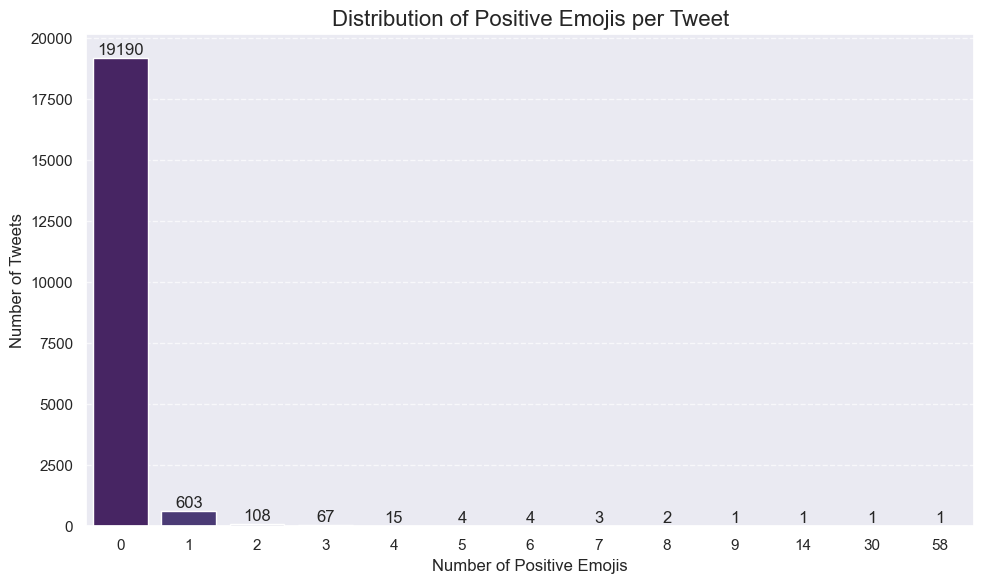

In [149]:
positive_counts = new_df['positive_emoji'].value_counts().reset_index()

# Rename the columns for clarity in the plot
positive_counts.columns = ['Number of Positive Emojis', 'Frequency of Tweets']

# Sort by the number of emojis for a cleaner plot (optional but recommended)
positive_counts = positive_counts.sort_values(by='Number of Positive Emojis')

# --- 3. Create the bar plot ---
plt.figure(figsize=(10, 6)) # Adjust figure size as needed
sns.barplot(
    x='Number of Positive Emojis',
    y='Frequency of Tweets',
    data=positive_counts,
    palette='viridis' # Choose a color palette you like
)

# Add title and labels for clarity
plt.title('Distribution of Positive Emojis per Tweet', fontsize=16)
plt.xlabel('Number of Positive Emojis', fontsize=12)
plt.ylabel('Number of Tweets', fontsize=12)

# Optional: Add the frequency count on top of each bar for better readability
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%d', label_type='edge')

plt.grid(axis='y', linestyle='--', alpha=0.7) # Add a horizontal grid for readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


In [135]:
new_df['negative_emoji'].value_counts()

negative_emoji
0     19696
1       229
2        36
3        16
4        13
6         3
9         2
5         2
7         2
12        1
Name: count, dtype: int64

C:\Users\hp\AppData\Local\Temp\ipykernel_12060\1912269126.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


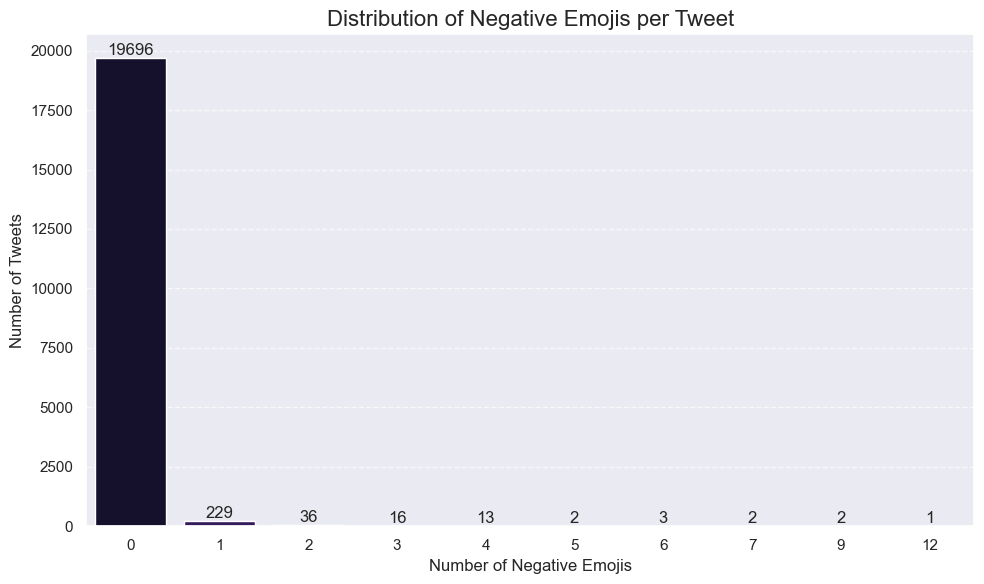

In [150]:
negative_counts = new_df['negative_emoji'].value_counts().reset_index()

# Rename the columns for clarity in the plot
negative_counts.columns = ['Number of Negative Emojis', 'Frequency of Tweets']

# Sort by the number of emojis for a cleaner plot (optional but recommended)
negative_counts = negative_counts.sort_values(by='Number of Negative Emojis')

# Create the bar plot
plt.figure(figsize=(10, 6)) # Adjust figure size as needed
sns.barplot(
    x='Number of Negative Emojis',
    y='Frequency of Tweets',
    data=negative_counts,
    palette='magma' # Choose a color palette you like
)

# Add title and labels for clarity
plt.title('Distribution of Negative Emojis per Tweet', fontsize=16)
plt.xlabel('Number of Negative Emojis', fontsize=12)
plt.ylabel('Number of Tweets', fontsize=12)

# Add the frequency count on top of each bar for better readability
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%d', label_type='edge')

plt.grid(axis='y', linestyle='--', alpha=0.7) # Add a horizontal grid for readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [136]:
new_df['neutral_emoji'].value_counts()

neutral_emoji
0     19851
1       109
3        15
2        12
4         6
5         3
6         2
20        1
7         1
Name: count, dtype: int64

C:\Users\hp\AppData\Local\Temp\ipykernel_12060\3750136246.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


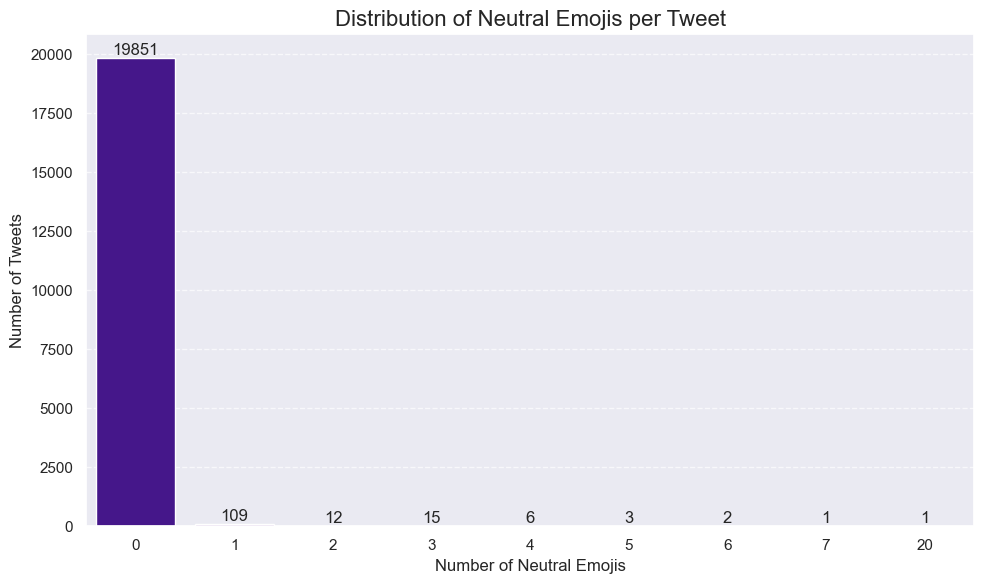

In [151]:
neutral_counts = new_df['neutral_emoji'].value_counts().reset_index()

# Rename the columns for clarity in the plot
neutral_counts.columns = ['Number of Neutral Emojis', 'Frequency of Tweets']

# Sort by the number of emojis for a cleaner plot (optional but recommended)
neutral_counts = neutral_counts.sort_values(by='Number of Neutral Emojis')

# Create the bar plot
plt.figure(figsize=(10, 6)) # Adjust figure size as needed
sns.barplot(
    x='Number of Neutral Emojis',
    y='Frequency of Tweets',
    data=neutral_counts,
    palette='plasma' # Changed to 'plasma' for visual distinction from previous plots
)

# Add title and labels for clarity
plt.title('Distribution of Neutral Emojis per Tweet', fontsize=16)
plt.xlabel('Number of Neutral Emojis', fontsize=12)
plt.ylabel('Number of Tweets', fontsize=12)

# Add the frequency count on top of each bar for better readability
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%d', label_type='edge')

plt.grid(axis='y', linestyle='--', alpha=0.7) # Add a horizontal grid for readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

### Lexicon-Based Sentiment Analysis with VADER

In [156]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [208]:
new_df.head()

,post_text,followers,friends,favourites,statuses,retweets,label,month,year,tokens,frequency,positive_emoji,negative_emoji,neutral_emoji,compound_score,vader_sentiment,date
0,2 years since diagnosed #anxiety #depression. ...,84,211,251,837,0,1,8,2015,"[2, years, since, diagnosed, anxiety, depressi...",13,0,0,0,0.0000,neutral,2015-08-01
1,"sunday, need break, planning spend little time...",84,211,251,837,1,1,8,2015,"[sunday, need, break, planning, spend, little,...",9,0,0,0,0.0000,neutral,2015-08-01
2,awake tired. need sleep brain ideas...,84,211,251,837,0,1,8,2015,"[awake, tired, need, sleep, brain, ideas]",6,0,0,0,-0.4404,negative,2015-08-01
3,rt @sewhq: #retro bears make perfect gifts gre...,84,211,251,837,2,1,8,2015,"[rt, sewhq, retro, bears, make, perfect, gifts...",18,0,0,0,0.8550,positive,2015-08-01
4,it’s hard say whether packing lists making lif...,84,211,251,837,1,1,8,2015,"[it, ’, s, hard, say, whether, packing, lists,...",16,0,0,0,0.3400,positive,2015-08-01


In [200]:
from nltk.sentiment import SentimentIntensityAnalyzer  # VADER sentiment analyzer

# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to classify sentiment based on VADER compound score
def vader_sentiment_classify(text):
    scores = sia.polarity_scores(text)
    compound = scores['compound']
    if compound >= 0.05:
        return 'positive'
    elif compound <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Calculate and add the compound sentiment score for each cleaned review
new_df['compound_score'] = new_df['post_text'].astype(str).apply(lambda x: sia.polarity_scores(x)['compound'])

# Apply the function on the cleaned text (or original text if preferred)
new_df['vader_sentiment'] = new_df['post_text'].astype(str).apply(vader_sentiment_classify)

# Display the first 10 rows of cleaned reviews and their corresponding VADER sentiment labels
print(new_df[['post_text', 'vader_sentiment']].head(n=20))

                                            post_text vader_sentiment
0   2 years since diagnosed #anxiety #depression. ...         neutral
1   sunday, need break, planning spend little time...         neutral
2              awake tired. need sleep brain ideas...        negative
3   rt @sewhq: #retro bears make perfect gifts gre...        positive
4   it’s hard say whether packing lists making lif...        positive
5      making packing lists new hobby... #movinghouse         neutral
6   point keeping stuff nostalgic reasons cross li...         neutral
7   currently finding-boxes-of-random-shit packing...         neutral
8        can't bothered cook, take away way 😁👍🏼 #lazy        positive
9   rt @itventsnews: itv releases promo video fina...         neutral
10   ... also, much stuff. way, way much #movinghouse         neutral
11  never want put one together #lotharderthanitlo...        negative
12  moving stuff bloomin’ knackering... there’s st...         neutral
13  back house, movi

### ML-based models to score tweets

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Example: assume you already have labeled tweets (X = text, y = sentiment labels)
X = new_df['post_text'].astype(str)
y = new_df['label']   
# Text vectorization
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_tfidf = tfidf.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# ML model (Logistic Regression)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.87      0.86      1981
           1       0.87      0.86      0.86      2019

    accuracy                           0.86      4000
   macro avg       0.86      0.86      0.86      4000
weighted avg       0.86      0.86      0.86      4000



In [203]:
new_df.head(2)

,post_text,followers,friends,favourites,statuses,retweets,label,month,year,tokens,frequency,positive_emoji,negative_emoji,neutral_emoji,compound_score,vader_sentiment
0,2 years since diagnosed #anxiety #depression. ...,84,211,251,837,0,1,8,2015,"[2, years, since, diagnosed, anxiety, depressi...",13,0,0,0,0.0,neutral
1,"sunday, need break, planning spend little time...",84,211,251,837,1,1,8,2015,"[sunday, need, break, planning, spend, little,...",9,0,0,0,0.0,neutral


### sentiment distributions over time or based on user metadata

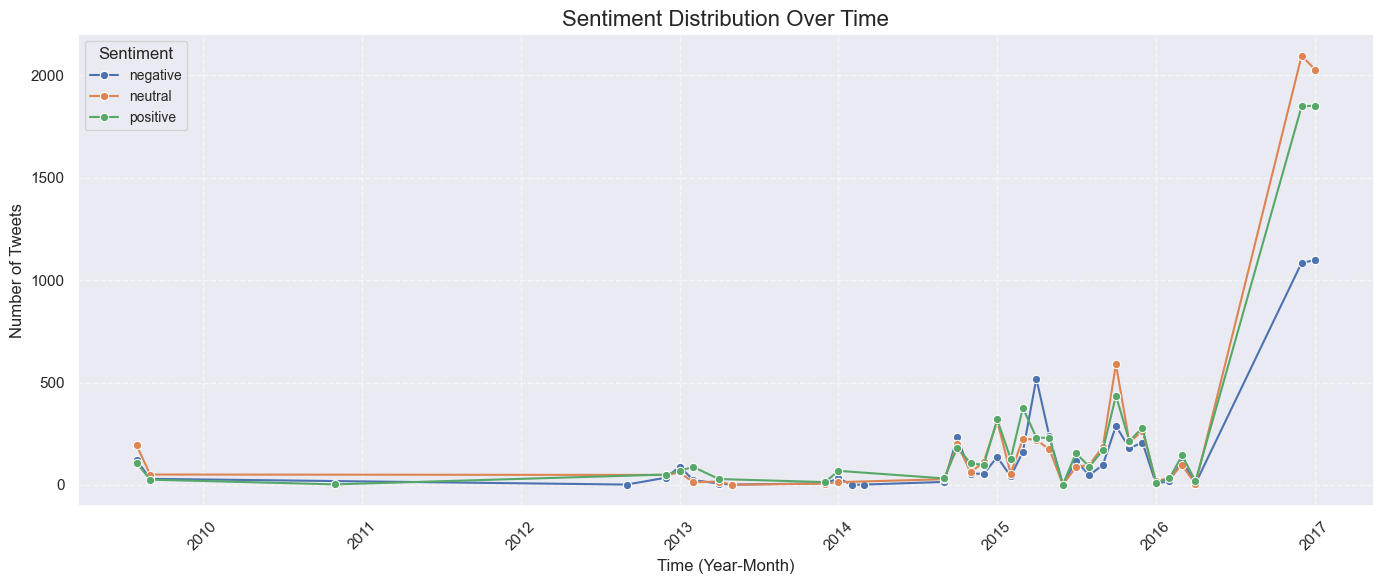

In [207]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a proper datetime column (year-month)
new_df['date'] = pd.to_datetime(new_df[['year','month']].assign(day=1))

# Group by date and sentiment
sentiment_over_time = (
    new_df.groupby(['date', 'vader_sentiment'])
    .size()
    .reset_index(name='count')
)

# Plot
plt.figure(figsize=(14,6))
sns.lineplot(
    data=sentiment_over_time,
    x="date", y="count", hue="vader_sentiment",
    marker="o"
)

plt.title("Sentiment Distribution Over Time", fontsize=16)
plt.xlabel("Time (Year-Month)", fontsize=12)
plt.ylabel("Number of Tweets", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(title="Sentiment", fontsize=10)

plt.tight_layout()
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_12060\546991431.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=followers_by_sentiment, x="vader_sentiment", y="followers", palette="viridis")


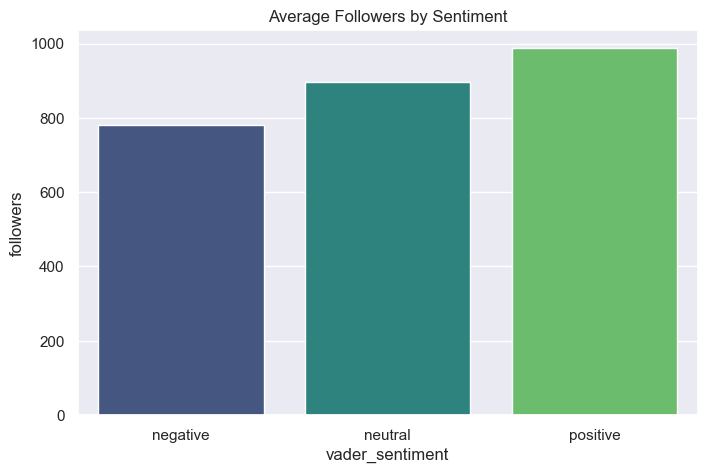

In [205]:
# Average followers by sentiment
followers_by_sentiment = new_df.groupby("vader_sentiment")["followers"].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=followers_by_sentiment, x="vader_sentiment", y="followers", palette="viridis")
plt.title("Average Followers by Sentiment")
plt.show()


# Classification

In [211]:
new_df.head(1).to_dict(orient="records")

[{'post_text': '2 years since diagnosed #anxiety #depression. today taking moment reflect far come since.',
  'followers': 84,
  'friends': 211,
  'favourites': 251,
  'statuses': 837,
  'retweets': 0,
  'label': 1,
  'month': 8,
  'year': 2015,
  'tokens': WordList(['2', 'years', 'since', 'diagnosed', 'anxiety', 'depression', 'today', 'taking', 'moment', 'reflect', 'far', 'come', 'since']),
  'frequency': 13,
  'positive_emoji': 0,
  'negative_emoji': 0,
  'neutral_emoji': 0,
  'compound_score': 0.0,
  'vader_sentiment': 'neutral',
  'date': Timestamp('2015-08-01 00:00:00')}]

In [212]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Assume your dataset is already in a DataFrame
# with columns: 'post_text' and 'label'
df = new_df.copy()   # replace with your actual DataFrame

# Features (text) and target (label)
X = df['post_text'].astype(str)   # convert to string just in case
y = df['label']

# Convert text into TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_tfidf = vectorizer.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42, stratify=y
)

# Train SVM model (linear kernel usually works well for text)
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)


In [213]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# ---------------------------
# Example: Predict on a new post
# ---------------------------
new_post = ["2 years since diagnosed #anxiety #depression. today taking moment reflect far come since."]

new_post_tfidf = vectorizer.transform(new_post)
prediction = svm_model.predict(new_post_tfidf)

print("Prediction:", prediction[0])  # 1 = Depressed, 0 = Non-Depressed

Accuracy: 0.8635
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      2000
           1       0.86      0.87      0.86      2000

    accuracy                           0.86      4000
   macro avg       0.86      0.86      0.86      4000
weighted avg       0.86      0.86      0.86      4000

Prediction: 1


In [214]:
import joblib

joblib.dump(vectorizer, "tfidf_vectorizer.pkl")
joblib.dump(svm_model, "svm_depression_model.pkl")


['svm_depression_model.pkl']

In [215]:
import joblib

# Load saved artifacts
vectorizer = joblib.load("tfidf_vectorizer.pkl")
svm_model = joblib.load("svm_depression_model.pkl")

# Example post
new_post = ["2 years since diagnosed #anxiety #depression. today taking moment reflect far come since."]

# Transform + predict
new_post_tfidf = vectorizer.transform(new_post)
prediction = svm_model.predict(new_post_tfidf)

print("Prediction:", "Depressed" if prediction[0] == 1 else "Non-Depressed")


Prediction: Depressed
